# Fashion MNIST Dataset
https://www.kaggle.com/zalando-research/fashionmnist

In [40]:
from IPython.display import Image
Image(url='https://www.tensorflow.org/tutorials/keras/classification_files/output_oZTImqg_CaW1_0.png')

In [1]:
%pylab inline
import pandas as pd
import seaborn as sns

Populating the interactive namespace from numpy and matplotlib


In [2]:
ds = pd.read_csv('data/fashion-mnist_train.csv')
ds

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,1,0,0,0,0,0,0,0,0,0,...,73,0,0,0,0,0,0,0,0,0
59997,8,0,0,0,0,0,0,0,0,0,...,160,162,163,135,94,0,0,0,0,0
59998,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


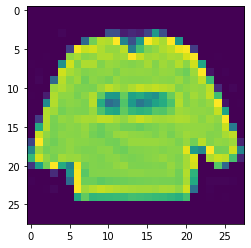

In [3]:
plt.imshow(ds.drop('label', axis=1).iloc[0, :].values.reshape(28, 28, 1));

In [4]:
from sklearn.model_selection import train_test_split

y = ds['label'].values
X = ds.drop('label', axis=1).values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [6]:
from sklearn.linear_model import LogisticRegression

In [11]:
%%time
logreg = LogisticRegression().fit(X_train, y_train)

CPU times: user 43 s, sys: 1.27 s, total: 44.2 s
Wall time: 23.6 s


/Users/filonov/.venv/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [12]:
from sklearn.metrics import accuracy_score

y_pred_logreg = logreg.predict(X_test)
accuracy_score(y_test, y_pred_logreg)

0.8496111111111111

In [13]:
logreg.coef_.shape

(10, 784)

In [14]:
logreg.intercept_.shape

(10,)

In [15]:
coef = np.hstack((logreg.intercept_.reshape(-1, 1), logreg.coef_))
np.savetxt("logreg_coef.txt", coef)

In [16]:
coef.shape

(10, 785)

## CatBoost

In [18]:
from catboost import CatBoostClassifier

cb = CatBoostClassifier(iterations=100, eval_metric='Accuracy')
cb.fit(X_train, y_train, eval_set=(X_test, y_test), verbose=False, plot=True);

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

In [19]:
y_pred_cb = cb.predict(X_test)
accuracy_score(y_test, y_pred_cb)

0.8680555555555556

In [27]:
cb.save_model('model.cbm')

## MLP

In [20]:
from keras import Sequential
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Input

batch_size = 128
num_classes = 10
epochs = 20


x_train = X_train.astype('float32')
x_test = X_test.astype('float32')
x_train /= 255
x_test /= 255


model = Sequential()
model.add(Dense(128, use_bias=False, activation='sigmoid', input_shape=(x_train.shape[1],)))
model.add(Dense(num_classes, use_bias=False, activation='softmax'))

model.summary()

model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))

2021-08-17 11:42:04.095728: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2021-08-17 11:42:04.179588: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               100352    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1280      
Total params: 101,632
Trainable params: 101,632
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
329/329 [==============================] - 3s 8ms/step - loss: 0.7515 - accuracy: 0.7651 - val_loss: 0.5153 - val_accuracy: 0.8234
Epoch 2/20
329/329 [==============================] - 2s 7ms/step - loss: 0.4781 - accuracy: 0.8329 - val_loss: 0.4527 - val_accuracy: 0.8362
Epoch 3/20
329/329 [==============================] - 1s 4ms/step - loss: 0.4292 - accuracy: 0.8475 - val_loss: 0.4122 - val_accuracy: 0.8551
Epoch 4/20
329/329 [==============================] - 2s 5ms/step - loss: 0.4012 - acc

Text(0, 0.5, 'Accuracy')

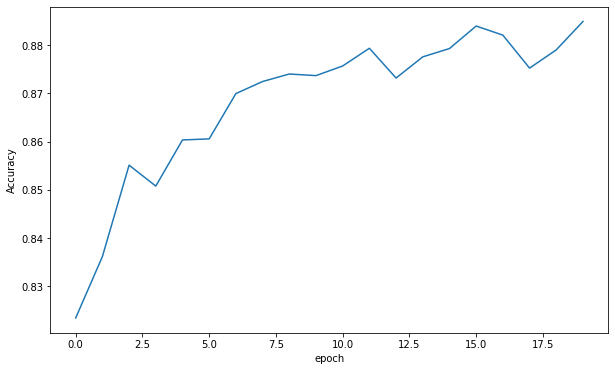

In [21]:
plt.figure(figsize=(10, 6))
plt.plot(history.history['val_accuracy'])
plt.xlabel('epoch')
plt.ylabel('Accuracy')

In [22]:
y_pred_mlp = np.argmax(model.predict(x_test), axis=1)
accuracy_score(y_test, y_pred_mlp)

0.8848888888888888

In [39]:
w1.shape

(784, 128)

In [23]:
input_layer = model.layers[0]
w1 = input_layer.get_weights()[0]
w2 = model.layers[1].get_weights()[0]

np.savetxt("w1.txt", w1)
np.savetxt("w2.txt", w2)

In [26]:
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dropout

cnn_model = Sequential()
cnn_model.add(Input(shape=(28, 28, 1), name="input"))
cnn_model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu'))
cnn_model.add(MaxPooling2D(pool_size=(2, 2)))
cnn_model.add(Conv2D(64, (3, 3), activation='relu'))
cnn_model.add(MaxPooling2D(pool_size=(2, 2)))
cnn_model.add(Flatten())
cnn_model.add(Dense(128, activation='relu'))
cnn_model.add(Dense(num_classes, activation='softmax'))

cnn_model.summary()

cnn_model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

cnn_history = cnn_model.fit(x_train.reshape(-1, 28, 28, 1), y_train,
                        batch_size=batch_size,
                        epochs=epochs,
                        verbose=1,
                        validation_data=(x_test.reshape(-1, 28, 28, 1), y_test))

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 128)               204928    
_________________________________________________________________
dense_7 (Dense)              (None, 10)               

Text(0, 0.5, 'Accuracy')

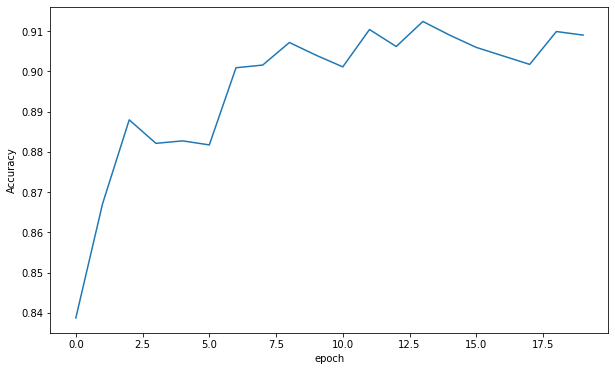

In [28]:
plt.figure(figsize=(10, 6))
plt.plot(cnn_history.history['val_accuracy'])
plt.xlabel('epoch')
plt.ylabel('Accuracy')

In [29]:
y_pred_cnn = np.argmax(cnn_model.predict(x_test.reshape(-1, 28, 28, 1)), axis=1)
accuracy_score(y_test, y_pred_cnn)

0.909

In [30]:
cnn_model.save('saved_model')

2021-08-17 11:56:21.264805: W tensorflow/python/util/util.cc:348] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


INFO:tensorflow:Assets written to: saved_model/assets


## Сохраняем проверочную выборку

In [38]:
test = np.hstack((y_test.reshape(-1, 1), X_test))
np.savetxt('test.csv', test, delimiter=',', fmt="%d")